In [1]:
import re
import os
import copy
import numpy as np
import jieba 
import jieba.analyse as anls
import jieba.posseg as pseg
jieba.load_userdict('../pos_neg/emoji.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\13113\AppData\Local\Temp\jieba.cache
Loading model cost 1.245 seconds.
Prefix dict has been built successfully.


In [2]:
covid19 = '../data/covid-19_ch.txt'
fitness = '../data/fitness_ch.txt'
food = '../data/food_ch.txt'
funny = '../data/funny_ch.txt'
funny2 = '../data/funny2_ch.txt'
movie = '../data/movice_ch.txt'
music = '../data/music_ch.txt'
star = '../datastart_ch.txt'

path = {'covid19':covid19, 'fitness':fitness, 'food':food, 'funny':funny, 'funny2':funny2, 'movie':movie, 'music':music, 'star':star}

for i in path:
    if not os.path.exists(path[i]):
        print(i)


pos_path = '../pos_neg/pos_cn.txt'
neg_path = '../pos_neg/neg_cn.txt'

In [3]:

# cut and phrase
def process_v2_txt(path):
    cut_result = set()
    key_words = set()
    phrase = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line = map(lambda x : ''.join(re.findall('[\u4e00-\u9fff]', x)), line.strip())
            line = ''.join(line)
            cut_line = jieba.cut(line, cut_all=False, HMM=True)
            # cut_line_2 = copy.deepcopy(cut_line)
            # split words
            # print(list(cut_line))
            for c in list(cut_line):
                cut_result.add(c)

            # phrase
            words = pseg.cut(line)
            for _, flag in words:
                if flag not in phrase:
                    phrase[flag] = 0
                phrase[flag] += 1
        
    print(len(cut_result))
    # print(key_words, len(key_words))
    print(phrase)
    return cut_result, phrase


results =  {}
for n in path:
    cut_result, phrase = process_v2_txt(path[n])
    results[n] = {}
    results[n]['cut'] = cut_result
    results[n]['phrase'] = phrase     

263
{'n': 23080, 'v': 21752, 'ug': 1, 'nr': 1941, 'uj': 4318, 'x': 7029, 'z': 1706, 'a': 8367, 'ul': 1630, 'b': 479, 'r': 7124, 'o': 826, 'd': 6151, 'c': 1170, 'ns': 591, 'p': 1283, 's': 312, 'm': 2263, 'nrt': 350, 'l': 1516, 'f': 794, 'q': 582, 'y': 580, 'ng': 263, 'vn': 220, 'nz': 205, 'zg': 195, 'e': 271, 't': 530, 'i': 265}
1693
{'n': 29140, 'd': 13187, 'v': 41497, 'uj': 4679, 'l': 1575, 'r': 16734, 'c': 3391, 'nr': 6170, 'm': 3843, 'ng': 902, 't': 1547, 'p': 3971, 'ul': 9241, 'f': 1087, 'y': 5055, 'i': 1095, 'zg': 912, 'a': 8874, 'x': 9802, 'vn': 2555, 'ns': 944, 'nz': 479, 'q': 1073, 's': 241, 'e': 180, 'tg': 126, 'nrt': 415, 'mq': 1, 'nt': 2, 'ud': 273, 'rz': 1, 'ad': 416, 'u': 190, 'o': 7279, 'ug': 282, 'uz': 89, 'an': 139, 'vg': 364, 'ag': 23, 'b': 219, 'df': 152, 'j': 252, 'z': 429, 'yg': 162, 'g': 181, 'nrfg': 8}
356
{'s': 1, 'v': 23285, 'r': 9159, 'n': 13544, 't': 490, 'd': 7073, 'ug': 127, 'ul': 3421, 'x': 2942, 'm': 3905, 'a': 3285, 'y': 1225, 'f': 857, 'p': 1707, 'l': 24

In [4]:


# compare with positive and negative tables


def compare(cut_result, pos_path, neg_path):
    pos_f = open(pos_path, 'r')
    neg_f = open(neg_path, 'r')

    pp = set()
    nn = set()
    for p, n in zip(pos_f.readlines(), neg_f.readlines()):
        pp.add(p.strip())
        nn.add(n.strip())

    total_num = len(cut_result)
    pos_num = len(cut_result & pp)
    neg_num = len(cut_result & nn)

    print('total_num:{}, pos_num:{}, neg_num:{}'.format(total_num, pos_num, neg_num))
    # print(cut_result)

    pos_rate = pos_num / total_num
    neg_rate = neg_num / total_num

    print('pos_rate:{}, neg_rate:{}'.format(round(pos_rate, 3), round(neg_rate, 3)))
    return (pos_rate, neg_rate)
    print()

compare_result = {}
for n in results:
    print('==='*20)
    print('dataset: %s' % n)
    rate = compare(results[n]['cut'], pos_path, neg_path)
    compare_result[n] = rate

print(compare_result)


dataset: dance
total_num:263, pos_num:27, neg_num:9
pos_rate:0.103, neg_rate:0.034
dataset: music
total_num:1693, pos_num:121, neg_num:90
pos_rate:0.071, neg_rate:0.053
dataset: enter
total_num:356, pos_num:26, neg_num:20
pos_rate:0.073, neg_rate:0.056
dataset: food
total_num:7757, pos_num:396, neg_num:255
pos_rate:0.051, neg_rate:0.033
dataset: covid19
total_num:8170, pos_num:476, neg_num:328
pos_rate:0.058, neg_rate:0.04
dataset: star
total_num:6718, pos_num:384, neg_num:244
pos_rate:0.057, neg_rate:0.036
dataset: traffic
total_num:10722, pos_num:496, neg_num:402
pos_rate:0.046, neg_rate:0.037
{'dance': (0.10266159695817491, 0.034220532319391636), 'music': (0.07147076196101594, 0.05316007088009451), 'enter': (0.07303370786516854, 0.056179775280898875), 'food': (0.05105066391646255, 0.03287353358257058), 'covid19': (0.058261933904528766, 0.0401468788249694), 'star': (0.05715986900863352, 0.03632033343256922), 'traffic': (0.046260026114530874, 0.03749300503637381)}


 
n	普通名词  
f	方位名词  
s	处所名词  
t	时间  
nr	人名  
ns	地名  
nt	机构名  
nw	作品名  
nz	其他专名  
v	普通动词  
vd	动副词  
vn	名动词  
a	形容词  
ad	副形词  
an	名形词  
d	副词  
m	数量词  
q	量词  
r	代词  
p	介词  
c	连词  
u	助词  
xc	其他虚词  
w	标点符号  
PER	人名  
LOC	地名  
ORG	机构名  
TIME	时间  

In [5]:
## prhase


def stat_phrase(phrase):
    total = 0

    for ph in phrase:
        total += phrase[ph]
    print(total)

    rate ={}
    for ph in phrase:
        num = phrase[ph]
        r = round(num / total, 2)
        if r != 0:
            rate[ph] = r
    
    rate = sorted(rate.items(), key=lambda x: x[1], reverse=True)
    print(rate[:10])

    return dict(rate)
        
phrase_result = {}
for n in results:
    print('==='*20)
    print('dataset:%s' % n)
    rate = stat_phrase(results[n]['phrase'])
    phrase_result[n] = rate

# print(phrase_result)

dataset:dance
95794
[('n', 0.24), ('v', 0.23), ('a', 0.09), ('x', 0.07), ('r', 0.07), ('d', 0.06), ('uj', 0.05), ('nr', 0.02), ('z', 0.02), ('ul', 0.02)]
dataset:music
179177
[('v', 0.23), ('n', 0.16), ('r', 0.09), ('d', 0.07), ('ul', 0.05), ('a', 0.05), ('x', 0.05), ('o', 0.04), ('uj', 0.03), ('nr', 0.03)]
dataset:enter
87464
[('v', 0.27), ('n', 0.15), ('r', 0.1), ('d', 0.08), ('uj', 0.05), ('ul', 0.04), ('m', 0.04), ('a', 0.04), ('x', 0.03), ('p', 0.02)]
dataset:food
71070
[('v', 0.27), ('n', 0.17), ('r', 0.11), ('d', 0.07), ('x', 0.06), ('a', 0.04), ('uj', 0.04), ('ul', 0.03), ('y', 0.03), ('m', 0.03)]
dataset:covid19
70597
[('v', 0.31), ('n', 0.15), ('r', 0.09), ('d', 0.07), ('ns', 0.05), ('x', 0.04), ('uj', 0.04), ('a', 0.04), ('m', 0.03), ('ul', 0.03)]
dataset:star
51265
[('v', 0.21), ('n', 0.16), ('r', 0.11), ('nr', 0.08), ('d', 0.07), ('x', 0.04), ('uj', 0.04), ('a', 0.04), ('m', 0.03), ('ul', 0.03)]
dataset:traffic
121226
[('v', 0.27), ('n', 0.18), ('r', 0.09), ('d', 0.08), ('

In [6]:
# emoji()
def stat_emoji(path, emoji):
    save = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line = map(lambda x : ''.join(re.findall('[\u4e00-\u9fff]', x)), line.strip())
            line = ''.join(line)
            cut_line = jieba.cut(line, cut_all=False, HMM=True)
            for c in list(cut_line):
                save.append(c)

        stat = {}
        stat_rate = {}
        stat['total'] = 0
        for w in save:
            if w in emoji:
                stat['total'] += 1
                if w not in stat:
                    stat[w] = 0
                stat[w] += 1
        

        for e in stat:
            stat_rate[e] = round(stat[e] / stat['total'], 2)
        stat_rate = dict(list(sorted(stat_rate.items(), key=lambda x: x[1], reverse=True)))
        stat_rate = {i:stat_rate[i] for i in stat_rate if stat_rate[i] > 0}


        stat_rate['e_rate'] = stat_rate['total'] / len(set(save))

        # print(stat)
        print(stat_rate)



        return stat_rate
            
emoji = set()
with open('../pos_neg/emoji_v2.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        emoji.add(line.strip())
    
# print('emoji:', emoji)


emoji_results =  {}
for n in list(path.keys()):
    print('==='*20)
    print('dataset:%s' % n)
    rate = stat_emoji(path[n], emoji)
    emoji_results[n] = rate

# print(emoji_results)


dataset:dance
{'total': 1.0, '捂脸': 0.31, '玫瑰': 0.18, '呲牙': 0.16, '鼓掌': 0.1, '比心': 0.08, '看': 0.04, '赞': 0.04, '不看': 0.02, '大笑': 0.02, '得意': 0.02, '给力': 0.01, '耶': 0.01, '一起加油': 0.01, 'e_rate': 0.0038022813688212928}
dataset:music
{'total': 1.0, '捂脸': 0.31, '看': 0.17, '泪奔': 0.14, '流泪': 0.07, '泣不成声': 0.05, '不失礼貌的微笑': 0.03, '微笑': 0.02, '鼓掌': 0.02, '可怜': 0.02, '不看': 0.02, '惊呆': 0.02, '赞': 0.01, '感谢': 0.01, '我想静静': 0.01, '强壮': 0.01, '笑哭': 0.01, '发呆': 0.01, '黑脸': 0.01, '疑问': 0.01, '绝望的凝视': 0.01, '比心': 0.01, '亲亲': 0.01, '发怒': 0.01, 'e_rate': 0.0005906674542232723}
dataset:enter
{'total': 1.0, '捂脸': 0.38, '鼓掌': 0.32, '玫瑰': 0.14, '微笑': 0.06, '看': 0.05, '泣不成声': 0.05, 'e_rate': 0.0028089887640449437}
dataset:food
{'total': 1.0, '捂脸': 0.28, '鼓掌': 0.08, '看': 0.07, '呲牙': 0.07, '玫瑰': 0.06, '赞': 0.05, '微笑': 0.03, '泪奔': 0.03, '爱心': 0.03, '泣不成声': 0.02, '流泪': 0.02, '比心': 0.02, '抠鼻': 0.01, '灵机一动': 0.01, '害羞': 0.01, '送心': 0.01, '黑脸': 0.01, '奸笑': 0.01, '发呆': 0.01, '酷拽': 0.01, '舔屏': 0.01, '巧克力': 0.01, '一起加油'

[0.10266159695817491, 0.07147076196101594, 0.07303370786516854, 0.05105066391646255, 0.058261933904528766, 0.05715986900863352, 0.046260026114530874]
[0.034220532319391636, 0.05316007088009451, 0.056179775280898875, 0.03287353358257058, 0.0401468788249694, 0.03632033343256922, 0.03749300503637381]
[0.09, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04]
[0.0038022813688212928, 0.0005906674542232723, 0.0028089887640449437, 0.000128915817970865, 0.00012239902080783354, 0.00014885382554331647, 9.326618168252192e-05]


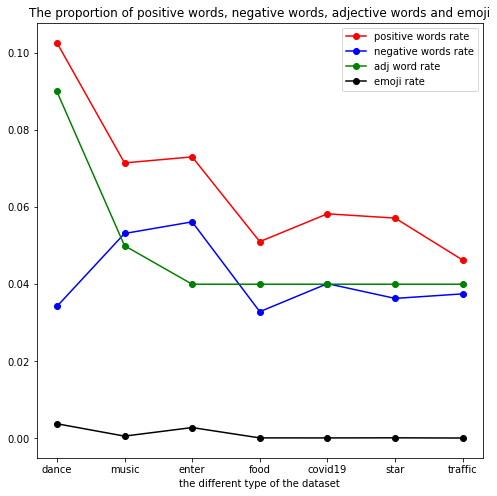

In [18]:

# related curve


def graph (names, compare_result, phrase_result, emoji_results):

    x = names

    pos_list = []
    neg_list = []
    adj_rate_list = []
    e_rate_list = []
    for n in names:
        pos_y = compare_result[n][0]    
        neg_y = compare_result[n][1]
        adj_rate_y = phrase_result[n]['a']
        e_rate_y = emoji_results[n]['e_rate']

        pos_list.append(pos_y)
        neg_list.append(neg_y)
        adj_rate_list.append(adj_rate_y)
        e_rate_list.append(e_rate_y)

    print(pos_list)
    print(neg_list)
    print(adj_rate_list)
    print(e_rate_list)

    plt.figure(figsize=(5, 5))
    plt.plot(x, pos_list, '-o', color='red', label='positive words rate',)
    plt.plot(x, neg_list, '-o', color='blue', label='negative words rate')
    plt.plot(x, adj_rate_list, '-o', color='green', label='adj word rate')
    plt.plot(x, e_rate_list, '-o', color='black', label='emoji rate')
    
    plt.legend(loc='best')
    plt.title('The proportion of positive words, negative words, adjective words and emoji')
    plt.xlabel('the different type of the dataset')
    plt.savefig("rate.png")
    plt.show()
    



names = [n for n in path]
graph(names, compare_result, phrase_result, emoji_results)



In [8]:
def key_words(path):
    key_words = set()
    with open(path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line = map(lambda x : ''.join(re.findall('[\u4e00-\u9fff]', x)), line.strip())
            line = ''.join(line)
            cut_line = jieba.cut(line, cut_all=False, HMM=True)

            # key words
            space_line = ' '.join(list(cut_line))
            kw = anls.extract_tags(sentence=space_line, topK=10, withWeight=True, allowPOS=('ns', 'n'))
            for i, w in kw:
                key_words.add((i, w))
    
    key_words = list(key_words)

    key_words = list(sorted(key_words, key=lambda x: x[1], reverse=True))[:30]
    print(key_words)
    return key_words

results_kw =  {}
for n in path:
    print('===='*20)
    print('dataset:%s' % n)
    k = key_words(path[n])
    results_kw[n] = k     


dataset:dance
[('学呀', 13.900677652), ('胖墩', 13.900677652), ('民族舞', 13.2075304714), ('小肉', 11.9547675029), ('胖妞', 11.9547675029), ('大长', 11.9547675029), ('胖妹', 11.9547675029), ('黑女', 11.9547675029), ('舞太', 11.9547675029), ('肉肉', 11.9547675029), ('大美女', 11.7034530746), ('短腿', 11.4157710022), ('小脚', 9.5186510173), ('小女孩', 9.23723855786), ('小腿', 9.16447920358), ('性感', 8.99540287354), ('樱桃', 8.89004235788), ('玫瑰', 8.45825994145), ('小孩', 7.53592689512), ('婴儿', 7.52565283215), ('头发', 6.53676415057), ('童趣', 6.40103268165), ('老师', 6.3734217326), ('女儿', 6.01572470622), ('同款', 5.97738375145), ('肉肉', 5.97738375145), ('崽崽太', 5.97738375145), ('土水', 5.97738375145), ('爱心', 5.683599496193334), ('胖子', 5.60089448003)]
dataset:music
[('六小龄童', 13.900677652), ('糖糖', 13.900677652), ('卤蛋', 13.900677652), ('铁站', 13.900677652), ('憨子', 13.2075304714), ('笑死人', 13.2075304714), ('棒棒', 13.2075304714), ('男明星', 13.2075304714), ('听的歌', 12.8020653633), ('七喜', 12.8020653633), ('花卉市场', 12.2912397395), ('大球', 12.2912397395

hsl(0, 79%, 75%)
hsl(0, 62%, 73%)
hsl(0, 76%, 73%)
hsl(0, 69%, 63%)
hsl(0, 75%, 64%)
hsl(0, 70%, 60%)
hsl(0, 64%, 72%)
hsl(0, 69%, 79%)
hsl(0, 64%, 61%)
hsl(0, 73%, 78%)
hsl(0, 66%, 71%)
hsl(0, 78%, 77%)
hsl(0, 72%, 79%)
hsl(0, 77%, 77%)
hsl(0, 73%, 74%)
hsl(0, 76%, 79%)
hsl(0, 67%, 63%)
hsl(0, 69%, 67%)
hsl(0, 76%, 75%)
hsl(0, 66%, 60%)
hsl(0, 67%, 74%)
hsl(0, 61%, 75%)
hsl(0, 64%, 68%)
hsl(0, 64%, 65%)
hsl(0, 61%, 61%)
hsl(0, 80%, 77%)
hsl(0, 71%, 60%)
hsl(0, 72%, 61%)
hsl(0, 65%, 79%)
hsl(0, 67%, 68%)
hsl(0, 68%, 68%)
hsl(0, 76%, 62%)
hsl(0, 80%, 80%)
hsl(0, 76%, 71%)
hsl(0, 74%, 61%)
hsl(0, 71%, 80%)
hsl(0, 76%, 68%)
hsl(0, 60%, 80%)
hsl(0, 67%, 70%)
hsl(0, 73%, 73%)
hsl(0, 74%, 75%)
hsl(0, 68%, 63%)
hsl(0, 76%, 61%)
hsl(0, 76%, 68%)
hsl(0, 65%, 73%)
hsl(0, 75%, 80%)
hsl(0, 65%, 77%)
hsl(0, 75%, 68%)
hsl(0, 76%, 63%)
hsl(0, 63%, 73%)
hsl(0, 70%, 67%)
hsl(0, 75%, 62%)
hsl(0, 66%, 70%)
hsl(0, 67%, 79%)
hsl(0, 67%, 66%)
hsl(0, 63%, 72%)
hsl(0, 75%, 77%)
hsl(0, 64%, 72%)
hsl(0, 60%, 73

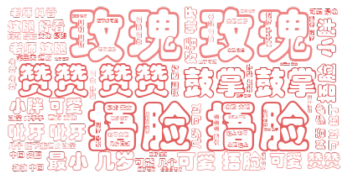

hsl(0, 64%, 66%)
hsl(0, 77%, 65%)
hsl(0, 64%, 60%)
hsl(0, 72%, 80%)
hsl(0, 75%, 71%)
hsl(0, 62%, 75%)
hsl(0, 71%, 80%)
hsl(0, 62%, 66%)
hsl(0, 69%, 70%)
hsl(0, 71%, 66%)
hsl(0, 76%, 74%)
hsl(0, 67%, 80%)
hsl(0, 62%, 61%)
hsl(0, 66%, 66%)
hsl(0, 66%, 71%)
hsl(0, 62%, 65%)
hsl(0, 78%, 67%)
hsl(0, 75%, 78%)
hsl(0, 65%, 60%)
hsl(0, 74%, 67%)
hsl(0, 77%, 71%)
hsl(0, 75%, 79%)
hsl(0, 74%, 68%)
hsl(0, 72%, 76%)
hsl(0, 70%, 62%)
hsl(0, 71%, 61%)
hsl(0, 76%, 79%)
hsl(0, 75%, 60%)
hsl(0, 68%, 79%)
hsl(0, 69%, 74%)
hsl(0, 69%, 68%)
hsl(0, 60%, 66%)
hsl(0, 65%, 76%)
hsl(0, 60%, 74%)
hsl(0, 63%, 78%)
hsl(0, 71%, 64%)
hsl(0, 78%, 68%)
hsl(0, 67%, 68%)
hsl(0, 64%, 65%)
hsl(0, 78%, 72%)
hsl(0, 68%, 66%)
hsl(0, 68%, 71%)
hsl(0, 69%, 79%)
hsl(0, 72%, 70%)
hsl(0, 63%, 73%)
hsl(0, 60%, 67%)
hsl(0, 77%, 70%)
hsl(0, 62%, 61%)
hsl(0, 72%, 62%)
hsl(0, 74%, 61%)
hsl(0, 67%, 60%)
hsl(0, 71%, 70%)
hsl(0, 62%, 60%)
hsl(0, 69%, 68%)
hsl(0, 80%, 66%)
hsl(0, 72%, 78%)
hsl(0, 68%, 60%)
hsl(0, 62%, 76%)
hsl(0, 78%, 68

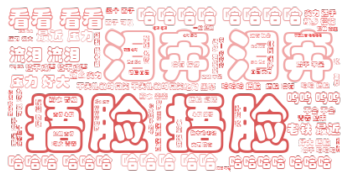

hsl(0, 70%, 61%)
hsl(0, 64%, 64%)
hsl(0, 65%, 79%)
hsl(0, 72%, 63%)
hsl(0, 60%, 64%)
hsl(0, 60%, 77%)
hsl(0, 76%, 60%)
hsl(0, 75%, 71%)
hsl(0, 78%, 74%)
hsl(0, 65%, 67%)
hsl(0, 75%, 78%)
hsl(0, 75%, 79%)
hsl(0, 71%, 80%)
hsl(0, 77%, 63%)
hsl(0, 63%, 75%)
hsl(0, 64%, 69%)
hsl(0, 65%, 80%)
hsl(0, 65%, 69%)
hsl(0, 70%, 63%)
hsl(0, 73%, 70%)
hsl(0, 71%, 68%)
hsl(0, 64%, 64%)
hsl(0, 70%, 74%)
hsl(0, 66%, 74%)
hsl(0, 63%, 76%)
hsl(0, 64%, 69%)
hsl(0, 74%, 65%)
hsl(0, 69%, 70%)
hsl(0, 69%, 74%)
hsl(0, 68%, 75%)
hsl(0, 71%, 70%)
hsl(0, 68%, 70%)
hsl(0, 80%, 80%)
hsl(0, 60%, 73%)
hsl(0, 74%, 74%)
hsl(0, 62%, 71%)
hsl(0, 76%, 71%)
hsl(0, 76%, 65%)
hsl(0, 62%, 62%)
hsl(0, 74%, 73%)
hsl(0, 62%, 69%)
hsl(0, 60%, 64%)
hsl(0, 77%, 62%)
hsl(0, 61%, 61%)
hsl(0, 60%, 73%)
hsl(0, 61%, 71%)
hsl(0, 65%, 77%)
hsl(0, 71%, 80%)
hsl(0, 70%, 72%)
hsl(0, 80%, 75%)
hsl(0, 73%, 69%)
hsl(0, 60%, 68%)
hsl(0, 65%, 78%)
hsl(0, 67%, 67%)
hsl(0, 78%, 66%)
hsl(0, 78%, 78%)
hsl(0, 79%, 73%)
hsl(0, 68%, 77%)
hsl(0, 79%, 61

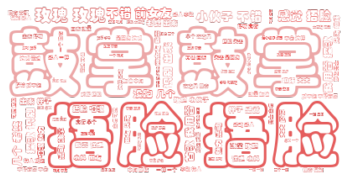

hsl(0, 78%, 64%)
hsl(0, 66%, 67%)
hsl(0, 73%, 67%)
hsl(0, 67%, 64%)
hsl(0, 67%, 68%)
hsl(0, 63%, 70%)
hsl(0, 60%, 79%)
hsl(0, 80%, 77%)
hsl(0, 62%, 74%)
hsl(0, 75%, 70%)
hsl(0, 70%, 66%)
hsl(0, 73%, 78%)
hsl(0, 61%, 76%)
hsl(0, 64%, 62%)
hsl(0, 64%, 80%)
hsl(0, 80%, 70%)
hsl(0, 74%, 80%)
hsl(0, 69%, 77%)
hsl(0, 76%, 77%)
hsl(0, 66%, 62%)
hsl(0, 72%, 60%)
hsl(0, 71%, 79%)
hsl(0, 65%, 67%)
hsl(0, 74%, 79%)
hsl(0, 67%, 68%)
hsl(0, 66%, 72%)
hsl(0, 67%, 63%)
hsl(0, 68%, 70%)
hsl(0, 64%, 75%)
hsl(0, 62%, 68%)
hsl(0, 60%, 63%)
hsl(0, 62%, 63%)
hsl(0, 66%, 72%)
hsl(0, 70%, 62%)
hsl(0, 67%, 62%)
hsl(0, 64%, 65%)
hsl(0, 69%, 63%)
hsl(0, 77%, 75%)
hsl(0, 63%, 60%)
hsl(0, 78%, 79%)
hsl(0, 65%, 66%)
hsl(0, 79%, 72%)
hsl(0, 68%, 72%)
hsl(0, 78%, 62%)
hsl(0, 63%, 65%)
hsl(0, 62%, 76%)
hsl(0, 62%, 70%)
hsl(0, 61%, 72%)
hsl(0, 73%, 77%)
hsl(0, 68%, 69%)
hsl(0, 63%, 60%)
hsl(0, 66%, 80%)
hsl(0, 64%, 79%)
hsl(0, 61%, 72%)
hsl(0, 64%, 61%)
hsl(0, 68%, 67%)
hsl(0, 67%, 75%)
hsl(0, 73%, 71%)
hsl(0, 66%, 71

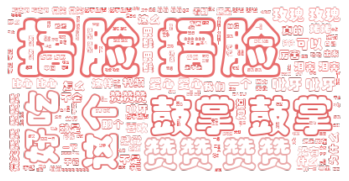

hsl(0, 65%, 68%)
hsl(0, 62%, 72%)
hsl(0, 60%, 71%)
hsl(0, 64%, 79%)
hsl(0, 66%, 77%)
hsl(0, 74%, 62%)
hsl(0, 66%, 71%)
hsl(0, 71%, 75%)
hsl(0, 74%, 66%)
hsl(0, 62%, 78%)
hsl(0, 66%, 62%)
hsl(0, 68%, 69%)
hsl(0, 67%, 71%)
hsl(0, 74%, 75%)
hsl(0, 69%, 79%)
hsl(0, 61%, 70%)
hsl(0, 79%, 64%)
hsl(0, 70%, 68%)
hsl(0, 76%, 72%)
hsl(0, 72%, 75%)
hsl(0, 63%, 72%)
hsl(0, 80%, 75%)
hsl(0, 69%, 77%)
hsl(0, 79%, 71%)
hsl(0, 79%, 65%)
hsl(0, 65%, 76%)
hsl(0, 75%, 73%)
hsl(0, 66%, 61%)
hsl(0, 66%, 67%)
hsl(0, 67%, 73%)
hsl(0, 75%, 67%)
hsl(0, 79%, 73%)
hsl(0, 70%, 60%)
hsl(0, 68%, 63%)
hsl(0, 77%, 68%)
hsl(0, 73%, 71%)
hsl(0, 66%, 66%)
hsl(0, 75%, 61%)
hsl(0, 72%, 69%)
hsl(0, 75%, 75%)
hsl(0, 73%, 64%)
hsl(0, 71%, 74%)
hsl(0, 68%, 75%)
hsl(0, 62%, 73%)
hsl(0, 72%, 63%)
hsl(0, 72%, 68%)
hsl(0, 67%, 75%)
hsl(0, 78%, 77%)
hsl(0, 77%, 76%)
hsl(0, 68%, 63%)
hsl(0, 69%, 66%)
hsl(0, 80%, 63%)
hsl(0, 64%, 60%)
hsl(0, 63%, 70%)
hsl(0, 74%, 64%)
hsl(0, 75%, 71%)
hsl(0, 80%, 71%)
hsl(0, 76%, 62%)
hsl(0, 76%, 66

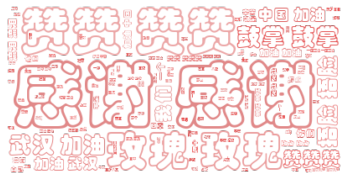

hsl(0, 71%, 68%)
hsl(0, 75%, 61%)
hsl(0, 65%, 72%)
hsl(0, 72%, 61%)
hsl(0, 79%, 66%)
hsl(0, 76%, 62%)
hsl(0, 72%, 80%)
hsl(0, 69%, 77%)
hsl(0, 74%, 75%)
hsl(0, 68%, 68%)
hsl(0, 77%, 73%)
hsl(0, 70%, 62%)
hsl(0, 74%, 77%)
hsl(0, 75%, 60%)
hsl(0, 60%, 79%)
hsl(0, 78%, 64%)
hsl(0, 70%, 66%)
hsl(0, 77%, 79%)
hsl(0, 67%, 69%)
hsl(0, 76%, 68%)
hsl(0, 68%, 66%)
hsl(0, 76%, 63%)
hsl(0, 63%, 73%)
hsl(0, 68%, 74%)
hsl(0, 63%, 72%)
hsl(0, 63%, 80%)
hsl(0, 73%, 62%)
hsl(0, 67%, 66%)
hsl(0, 69%, 67%)
hsl(0, 61%, 63%)
hsl(0, 65%, 64%)
hsl(0, 62%, 68%)
hsl(0, 63%, 72%)
hsl(0, 76%, 62%)
hsl(0, 70%, 62%)
hsl(0, 77%, 77%)
hsl(0, 73%, 66%)
hsl(0, 80%, 68%)
hsl(0, 69%, 66%)
hsl(0, 62%, 66%)
hsl(0, 60%, 77%)
hsl(0, 76%, 63%)
hsl(0, 64%, 67%)
hsl(0, 80%, 60%)
hsl(0, 71%, 61%)
hsl(0, 63%, 67%)
hsl(0, 67%, 73%)
hsl(0, 67%, 66%)
hsl(0, 64%, 78%)
hsl(0, 68%, 72%)
hsl(0, 70%, 61%)
hsl(0, 75%, 66%)
hsl(0, 65%, 77%)
hsl(0, 68%, 63%)
hsl(0, 78%, 68%)
hsl(0, 72%, 68%)
hsl(0, 70%, 63%)
hsl(0, 63%, 63%)
hsl(0, 60%, 66

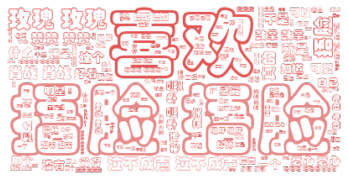

hsl(0, 75%, 79%)
hsl(0, 75%, 68%)
hsl(0, 74%, 72%)
hsl(0, 80%, 71%)
hsl(0, 79%, 69%)
hsl(0, 71%, 80%)
hsl(0, 76%, 77%)
hsl(0, 64%, 70%)
hsl(0, 67%, 61%)
hsl(0, 71%, 71%)
hsl(0, 68%, 79%)
hsl(0, 71%, 68%)
hsl(0, 68%, 61%)
hsl(0, 79%, 62%)
hsl(0, 61%, 72%)
hsl(0, 67%, 64%)
hsl(0, 61%, 67%)
hsl(0, 76%, 80%)
hsl(0, 72%, 63%)
hsl(0, 80%, 77%)
hsl(0, 63%, 66%)
hsl(0, 69%, 70%)
hsl(0, 67%, 73%)
hsl(0, 66%, 79%)
hsl(0, 78%, 66%)
hsl(0, 63%, 79%)
hsl(0, 75%, 77%)
hsl(0, 67%, 64%)
hsl(0, 63%, 64%)
hsl(0, 69%, 60%)
hsl(0, 76%, 66%)
hsl(0, 60%, 64%)
hsl(0, 78%, 61%)
hsl(0, 64%, 65%)
hsl(0, 63%, 67%)
hsl(0, 60%, 64%)
hsl(0, 75%, 70%)
hsl(0, 65%, 70%)
hsl(0, 69%, 63%)
hsl(0, 79%, 70%)
hsl(0, 74%, 76%)
hsl(0, 73%, 62%)
hsl(0, 62%, 79%)
hsl(0, 62%, 61%)
hsl(0, 68%, 65%)
hsl(0, 80%, 62%)
hsl(0, 64%, 69%)
hsl(0, 74%, 70%)
hsl(0, 66%, 66%)
hsl(0, 67%, 61%)
hsl(0, 61%, 69%)
hsl(0, 77%, 62%)
hsl(0, 78%, 60%)
hsl(0, 61%, 64%)
hsl(0, 72%, 60%)
hsl(0, 66%, 68%)
hsl(0, 73%, 63%)
hsl(0, 67%, 67%)
hsl(0, 79%, 67

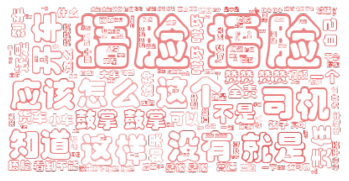

In [9]:
# words cloud 
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def random_color(word, font_size, position, orientation, font_path, random_state):
    s = 'hsl(0, %d%%, %d%%)' % (random.randint(60, 80), random.randint(60, 80))
    print(s)
    return s


def word_visual(n, path):
    cut_result = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line = map(lambda x : ''.join(re.findall('[\u4e00-\u9fff]', x)), line.strip())
            line = ''.join(line)
            cut_line = jieba.cut(line, cut_all=False, HMM=True)
            cut_result += list(cut_line)

    # cut_result = sorted(cut_result.)
    cut_result = ' '.join(cut_result)


    wc = WordCloud(color_func=random_color, 
                   font_path='STCAIYUN.TTF', 
                   mode='RGBA',
                #    width = 2000,
                #    height = 1400, 
                   background_color=None).generate(cut_result)
    
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wc.to_file('word_cloud/'+str(n)+'_grwordcloud.png')

    # print(len(cut_result))

for n in list(path.keys()):
    word_visual(n, path[n])
